# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word         | Definition                                                                                                                                                                                                                                                 |
| ------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| One-hot coding     | A technique that converts categorical variables into binary vectors where each category becomes a separate binary variable, with 1 indicating that the category is present and 0 if not.                                                                                  |
| Feature selection* | The process of selecting a subset of relevant features (variables) to reduce model complexity, improve performance, and avoid overfitting.                                                                                                                 |
| Classifier         | An algorithm that assigns data observations into one or more predefined classes or categories using patterns learned from training data.                                                                                                                   |
| Precision          | The fraction of positive predictions that were correct.                                                                                                                          |
| Recall             | The fraction of actual positive instances that were correctly identified by the model.                                                                                              |
| F1 Score           | The harmonic mean of precision and recall, providing a balanced performance metric.|
| Parsimonious model | A model that achieves good predictive performance using as few explanatory variables as possible, following the principle that simpler models are preferred.                                                                                               |
| Ridge regression   | A regularization technique that adds a penalty proportional to the squared magnitude of coefficients to shrink them toward zero.                          |
| LASSO regression   | A regularization technique that adds a penalty proportional to the absolute magnitude of coefficients, which can shrink some coefficients exactly to zero.                                                 |
| Cross validation   | A resampling technique that partitions data into multiple training and testing subsets to evaluate model performance on unseen data and prevent overfitting.                                                                                               |
| Tree based methods | Machine learning algorithms using decision trees or ensembles of trees (e.g., random forests, boosted trees) to make predictions.                                                                                                                          |

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
A perfect classifier on an ROC curve forms an L-shaped curve that goes from the bottom-left corner, up, and over to the top-right corner. This represents a True Positive Rate (TPR) of 1.0 and a False Positive Rate (FPR) of 0, meaning the classifier correctly identifies all positive cases without any false positives. The Area Under the Curve (AUC) for a perfect classifier is 1.0. A bad classifier appears as a diagonal line connecting the bottom-left corner to the top-right corner. This diagonal line represents a classifier that cannot distinguish between classes and performs no better than random guessing, with TPR equal to FPR at all threshold values. A random classifier has an AUC of 0.5.

#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
When the F1 score is close to 1, this indicates a excellent classifier performance and the model correctly identifies positive cases while making very few false positives and false negatives. 

When the F1 score is close to 0, this indicates poor classifier performance, suggesting that either precision or recall (or both) is very low. For example, a model with 90% precision but only 10% recall would have a low F1 score despite high precision, showing that high performance in one metric alone is insufficient.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
| Aspect                   | Linear                                                               | Logistic                                                                         |
| ------------------------ | -------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| Chart Shape              | Straight line (linear relationship between X and Y)                  | S-shaped curve (sigmoid function)                                                |
| Dependent Variable Type  | Continuous                                                           | Binary/Categorical                          |
| Purpose                  | Regression - predicting continuous numerical values                  | Classification - predicting probabilities and class membership                   |
| Range of output variable | Unbounded               | Bounded between 0 and 1                                            |
| Method*                  | Ordinary Least Squares - minimizes sum of squared residuals    | Maximum Likelihood Estimation - maximizes likelihood of observing the data |
| Example of use           | Predicting house prices from square footage, location, and amenities | Predicting probability of disease diagnosis, fraud detection, etc  |
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to train and test on separate data because it allows us to evaluate how well our model generalizes to new, unseen data rather than just how well it memorizes the training data. Training on the entire dataset and testing on the same data leads to overfitting, where the model performs well on known data but poorly on new data, making it unreliable for real-world predictions. By splitting the data into training and testing sets (typically 75% training and 25% testing), we can accurately estimate the model's true predictive performance and make informed decisions about its readiness for deployment.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

Linear regression is appropriate for this dataset because the target variable, median_house_value, is a continuous numerical variable that can take a range of values. The other predictor variables such as median_income, housing_median_age, total_rooms, population, households, longitude, and latitude are also continuous numeric variables that could have linear or near-linear relationships with house prices. Linear regression is designed to model the relationship between continuous predictors and a continuous outcome variable, making it suitable for predicting median house values based on these housing characteristics.

In [1]:
#QUESTIOn 5A ANSWER
# Load the housing dataset
housing <- read.csv("housing.csv")

# Look at the structure of the data
str(housing)

# Display the first few rows
head(housing)

# Get summary statistics
summary(housing)

# Check the dimensions
dim(housing)

'data.frame':	20640 obs. of  8 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: int  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : int  880 7099 1467 1274 1627 919 2535 3104 2555 3549 ...
 $ population        : int  322 2401 496 558 565 413 1094 1157 1206 1551 ...
 $ households        : int  126 1138 177 219 259 193 514 647 595 714 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: int  452600 358500 352100 341300 342200 269700 299200 241400 226700 261100 ...


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,-122.23,37.88,41,880,322,126,8.3252,452600
2,-122.22,37.86,21,7099,2401,1138,8.3014,358500
3,-122.24,37.85,52,1467,496,177,7.2574,352100
4,-122.25,37.85,52,1274,558,219,5.6431,341300
5,-122.25,37.85,52,1627,565,259,3.8462,342200
6,-122.25,37.85,52,919,413,193,4.0368,269700


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

[1] 20640     8

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [2]:
#ANSWER 5B

# Load the housing dataset
housing <- read.csv("housing.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the data (normalize all numeric columns)
housing_scaled <- as.data.frame(scale(housing))

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(housing_scaled))
train_indices <- sample(seq_len(nrow(housing_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- housing_scaled[train_indices, ]
test_data <- housing_scaled[-train_indices, ]

# Check dimensions
dim(train_data)
dim(test_data)

[1] 15480     8

[1] 5160    8

#### c) Fit the model.

In [3]:
#ANSWER 5C
# Load the housing dataset
housing <- read.csv("housing.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the data
housing_scaled <- as.data.frame(scale(housing))

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(housing_scaled))
train_indices <- sample(seq_len(nrow(housing_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- housing_scaled[train_indices, ]
test_data <- housing_scaled[-train_indices, ]

# Fit the linear regression model
# Predict median_house_value using all other variables
model <- lm(median_house_value ~ ., data = train_data)

# View model summary
summary(model)



Call:
lm(formula = median_house_value ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6929 -0.3844 -0.1012  0.2669  7.0686 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.0008768  0.0048872  -0.179   0.8576    
longitude          -0.7237084  0.0143999 -50.258   <2e-16 ***
latitude           -0.7732900  0.0145054 -53.310   <2e-16 ***
housing_median_age  0.1227835  0.0054735  22.432   <2e-16 ***
total_rooms        -0.0370233  0.0149344  -2.479   0.0132 *  
population         -0.4003812  0.0118345 -33.832   <2e-16 ***
households          0.4767179  0.0165913  28.733   <2e-16 ***
median_income       0.6333746  0.0060701 104.344   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.608 on 15472 degrees of freedom
Multiple R-squared:  0.6285,	Adjusted R-squared:  0.6284 
F-statistic:  3740 on 7 and 15472 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

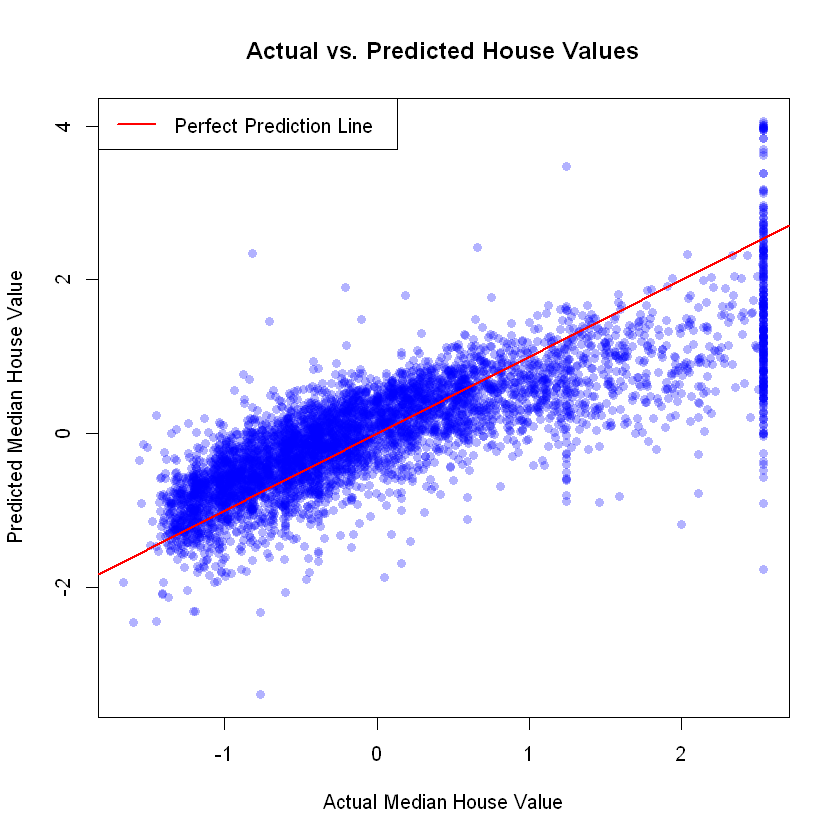

In [4]:
#Answer 5D
# Load the housing dataset
housing <- read.csv("housing.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the data
housing_scaled <- as.data.frame(scale(housing))

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(housing_scaled))
train_indices <- sample(seq_len(nrow(housing_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- housing_scaled[train_indices, ]
test_data <- housing_scaled[-train_indices, ]

# Fit the linear regression model
model <- lm(median_house_value ~ ., data = train_data)

# Make predictions on test data
predictions <- predict(model, newdata = test_data)

# Create actual vs. predicted plot
plot(test_data$median_house_value, predictions,
     xlab = "Actual Median House Value",
     ylab = "Predicted Median House Value",
     main = "Actual vs. Predicted House Values",
     pch = 16, col = rgb(0, 0, 1, 0.3))

# Add a diagonal reference line (perfect predictions)
abline(0, 1, col = "red", lwd = 2)

# Add a legend
legend("topleft", legend = "Perfect Prediction Line", 
       col = "red", lwd = 2)


#### e) Make a residuals plot.

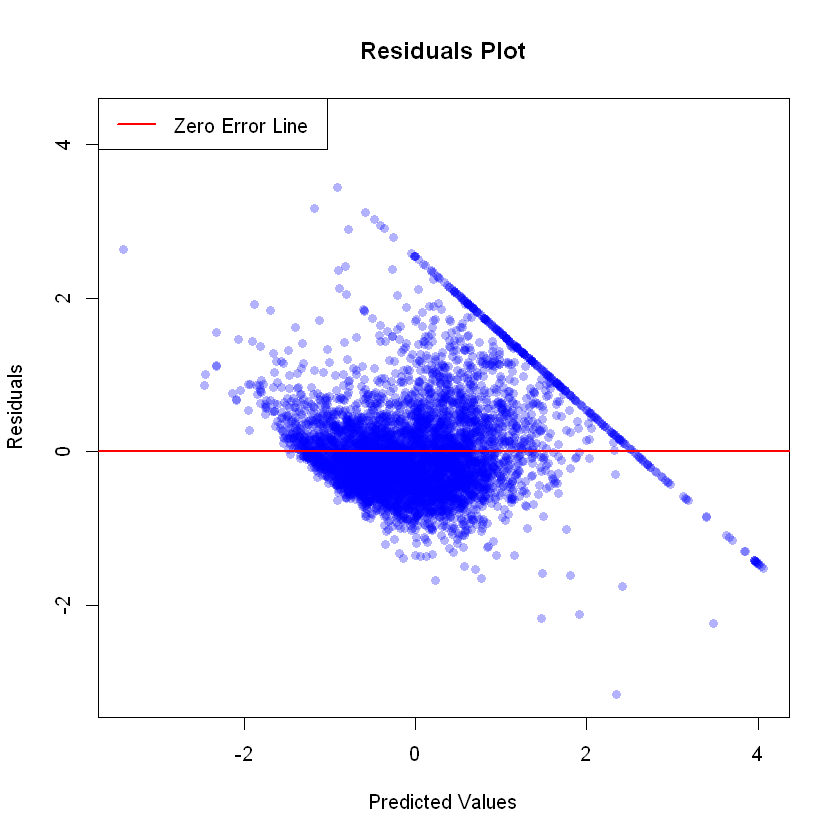

In [5]:
#Answer 5E
# Load the housing dataset
housing <- read.csv("housing.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the data
housing_scaled <- as.data.frame(scale(housing))

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(housing_scaled))
train_indices <- sample(seq_len(nrow(housing_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- housing_scaled[train_indices, ]
test_data <- housing_scaled[-train_indices, ]

# Fit the linear regression model
model <- lm(median_house_value ~ ., data = train_data)

# Make predictions on test data
predictions <- predict(model, newdata = test_data)

# Calculate residuals
residuals <- test_data$median_house_value - predictions

# Create residuals plot
plot(predictions, residuals,
     xlab = "Predicted Values",
     ylab = "Residuals",
     main = "Residuals Plot",
     pch = 16, col = rgb(0, 0, 1, 0.3))

# Add a horizontal reference line at y=0
abline(h = 0, col = "red", lwd = 2)

# Add a legend
legend("topleft", legend = "Zero Error Line", 
       col = "red", lwd = 2)


## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?
Logistic regression is appropriate for this dataset because the target variable, Outcome, is a binary categorical variable that represents diabetes diagnosis (0 = no diabetes, 1 = has diabetes). Unlike linear regression which predicts continuous values, logistic regression is specifically designed for binary classification problems where we want to predict the probability of belonging to one of two classes. The predictor variables (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) are continuous numeric variables that can be used to model the log-odds of having diabetes.

In [6]:
#Question 6A
# Load the diabetes dataset
diabetes <- read.csv("diabetes.csv")

# Look at the structure of the data
str(diabetes)

# Display the first few rows
head(diabetes)

# Get summary statistics
summary(diabetes)

# Check the dimensions
dim(diabetes)

# Check the distribution of the outcome variable
table(diabetes$Outcome)

# Calculate proportion of each class
prop.table(table(diabetes$Outcome))


'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

[1] 768   9


  0   1 
500 268 


        0         1 
0.6510417 0.3489583 

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [7]:
#Answer 6B
# Load the diabetes dataset
diabetes <- read.csv("diabetes.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the predictor variables (all columns except Outcome)
diabetes_scaled <- diabetes
diabetes_scaled[, -9] <- scale(diabetes[, -9])  # Scale all columns except the 9th (Outcome)

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(diabetes_scaled))
train_indices <- sample(seq_len(nrow(diabetes_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- diabetes_scaled[train_indices, ]
test_data <- diabetes_scaled[-train_indices, ]

# Check dimensions
dim(train_data)
dim(test_data)

# Check the outcome distribution in both sets
table(train_data$Outcome)
table(test_data$Outcome)


[1] 576   9

[1] 192   9


  0   1 
375 201 


  0   1 
125  67 

#### c) Fit the model.

In [8]:
#Answer 6C
# Load the diabetes dataset
diabetes <- read.csv("diabetes.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the predictor variables (all columns except Outcome)
diabetes_scaled <- diabetes
diabetes_scaled[, -9] <- scale(diabetes[, -9])  # Scale all columns except the 9th (Outcome)

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(diabetes_scaled))
train_indices <- sample(seq_len(nrow(diabetes_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- diabetes_scaled[train_indices, ]
test_data <- diabetes_scaled[-train_indices, ]

# Fit the logistic regression model
# Predict Outcome using all other variables
model <- glm(Outcome ~ ., data = train_data, family = binomial)

# View model summary
summary(model)



Call:
glm(formula = Outcome ~ ., family = binomial, data = train_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.90319    0.11273  -8.012 1.13e-15 ***
Pregnancies               0.39262    0.12637   3.107  0.00189 ** 
Glucose                   1.17671    0.14189   8.293  < 2e-16 ***
BloodPressure            -0.26430    0.11480  -2.302  0.02131 *  
SkinThickness             0.07704    0.12533   0.615  0.53875    
Insulin                  -0.15585    0.11655  -1.337  0.18117    
BMI                       0.67134    0.13611   4.932 8.12e-07 ***
DiabetesPedigreeFunction  0.23841    0.10927   2.182  0.02912 *  
Age                       0.18663    0.12792   1.459  0.14456    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [9]:
# Load the diabetes dataset
diabetes <- read.csv("diabetes.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the predictor variables (all columns except Outcome)
diabetes_scaled <- diabetes
diabetes_scaled[, -9] <- scale(diabetes[, -9])

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(diabetes_scaled))
train_indices <- sample(seq_len(nrow(diabetes_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- diabetes_scaled[train_indices, ]
test_data <- diabetes_scaled[-train_indices, ]

# Fit the logistic regression model
model <- glm(Outcome ~ ., data = train_data, family = binomial)

# Make predictions on test data (probabilities)
predicted_probabilities <- predict(model, newdata = test_data, type = "response")

# Convert probabilities to class predictions (threshold = 0.5)
predicted_classes <- ifelse(predicted_probabilities > 0.5, 1, 0)

# Get actual values
actual_classes <- test_data$Outcome

# Create confusion matrix
confusion_matrix <- table(Actual = actual_classes, Predicted = predicted_classes)
print(confusion_matrix)

# Calculate metrics
TN <- confusion_matrix[1, 1]  # True Negatives
FP <- confusion_matrix[1, 2]  # False Positives
FN <- confusion_matrix[2, 1]  # False Negatives
TP <- confusion_matrix[2, 2]  # True Positives

# Calculate accuracy
accuracy <- (TP + TN) / (TP + TN + FP + FN)

# Print results
cat("\n=== Classification Results ===\n")
cat("True Positives (TP):", TP, "\n")
cat("False Positives (FP):", FP, "\n")
cat("True Negatives (TN):", TN, "\n")
cat("False Negatives (FN):", FN, "\n")
cat("Accuracy:", round(accuracy, 4), "\n")


      Predicted
Actual   0   1
     0 112  13
     1  31  36

=== Classification Results ===
True Positives (TP): 36 
False Positives (FP): 13 
True Negatives (TN): 112 
False Negatives (FN): 31 
Accuracy: 0.7708 


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [10]:
#Answer 6D
# Install and load required library
library(glmnet)

# Load the diabetes dataset
diabetes <- read.csv("diabetes.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the predictor variables (all columns except Outcome)
diabetes_scaled <- diabetes
diabetes_scaled[, -9] <- scale(diabetes[, -9])

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(diabetes_scaled))
train_indices <- sample(seq_len(nrow(diabetes_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- diabetes_scaled[train_indices, ]
test_data <- diabetes_scaled[-train_indices, ]

# Prepare data for glmnet (needs matrix format)
x_train <- as.matrix(train_data[, -9])  # Predictor variables
y_train <- train_data$Outcome           # Response variable

x_test <- as.matrix(test_data[, -9])
y_test <- test_data$Outcome

# Fit LASSO logistic regression model with cross-validation
set.seed(123)
cv_lasso <- cv.glmnet(x_train, y_train, family = "binomial", alpha = 1)

# Get the best lambda
best_lambda <- cv_lasso$lambda.min
cat("Best lambda:", best_lambda, "\n\n")

# Fit final LASSO model with best lambda
lasso_model <- glmnet(x_train, y_train, family = "binomial", alpha = 1, lambda = best_lambda)

# Display coefficients
lasso_coefficients <- coef(lasso_model)
cat("=== LASSO Coefficients ===\n")
print(lasso_coefficients)

# Identify non-zero variables (most important)
cat("\n=== Important Variables (Non-zero coefficients) ===\n")
non_zero_vars <- rownames(lasso_coefficients)[lasso_coefficients[,1] != 0]
non_zero_vals <- lasso_coefficients[lasso_coefficients[,1] != 0]
for(i in 1:length(non_zero_vars)) {
  cat(non_zero_vars[i], ":", non_zero_vals[i], "\n")
}

# Make predictions on test data
lasso_predicted_prob <- predict(lasso_model, newx = x_test, type = "response")
lasso_predicted_classes <- ifelse(lasso_predicted_prob > 0.5, 1, 0)

# Create confusion matrix for LASSO
lasso_confusion <- table(Actual = y_test, Predicted = lasso_predicted_classes)
cat("\n=== LASSO Confusion Matrix ===\n")
print(lasso_confusion)

# Calculate LASSO metrics
TN_lasso <- lasso_confusion[1, 1]
FP_lasso <- lasso_confusion[1, 2]
FN_lasso <- lasso_confusion[2, 1]
TP_lasso <- lasso_confusion[2, 2]

lasso_accuracy <- (TP_lasso + TN_lasso) / (TP_lasso + TN_lasso + FP_lasso + FN_lasso)

cat("\n=== LASSO Classification Results ===\n")
cat("True Positives (TP):", TP_lasso, "\n")
cat("False Positives (FP):", FP_lasso, "\n")
cat("True Negatives (TN):", TN_lasso, "\n")
cat("False Negatives (FN):", FN_lasso, "\n")
cat("LASSO Accuracy:", round(lasso_accuracy, 4), "\n")

cat("\n=== Comparison ===\n")
cat("Regular Logistic Regression Accuracy: 0.7708\n")
cat("LASSO Logistic Regression Accuracy:", round(lasso_accuracy, 4), "\n")
cat("Difference:", round(lasso_accuracy - 0.7708, 4), "\n")

Warning message:
"package 'glmnet' was built under R version 4.5.2"
Loading required package: Matrix

Loaded glmnet 4.1-10



Best lambda: 0.005550794 

=== LASSO Coefficients ===
9 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)              -0.876177594
Pregnancies               0.358481736
Glucose                   1.094460835
BloodPressure            -0.191928078
SkinThickness             0.008669839
Insulin                  -0.076263652
BMI                       0.616992765
DiabetesPedigreeFunction  0.199028628
Age                       0.155759915

=== Important Variables (Non-zero coefficients) ===
(Intercept) : -0.8761776 
Pregnancies : 0.3584817 
Glucose : 1.094461 
BloodPressure : -0.1919281 
SkinThickness : 0.008669839 
Insulin : -0.07626365 
BMI : 0.6169928 
DiabetesPedigreeFunction : 0.1990286 
Age : 0.1557599 

=== LASSO Confusion Matrix ===
      Predicted
Actual   0   1
     0 113  12
     1  33  34

=== LASSO Classification Results ===
True Positives (TP): 34 
False Positives (FP): 12 
True Negatives (TN): 113 
False Negatives (FN): 33 
LASSO Accuracy:

In [ ]:
#Answer 6E
## Answer to Question 6e

All eight predictor variables remained non-zero in the LASSO model, meaning LASSO did not eliminate any variables through feature selection. 
However, the most important variables based on coefficient magnitude are:

1. Glucose (1.0945) - Most important predictor with the largest positive coefficient
2. BMI (0.6170) - Second most important positive predictor
3. Pregnancies (0.3585) - Third most important positive predictor
4. DiabetesPedigreeFunction (0.1990) - Moderate positive effect
5. BloodPressure (-0.1919) - Moderate negative effect
6. Age (0.1558) - Small positive effect
7. Insulin (-0.0763) - Small negative effect
8. SkinThickness (0.0087) - Smallest effect, nearly zero

The LASSO model resulted in a slightly lower accuracy (76.56%) compared to the regular 
logistic regression model (77.08%). This small reduction 
in accuracy is the trade-off for the benefits LASSO provides: reduced overfitting, better generalization to 
new data, and simpler model interpretation through coefficient shrinkage.

#### f) Make a plot of actual vs. predicted values for the LASSO model.

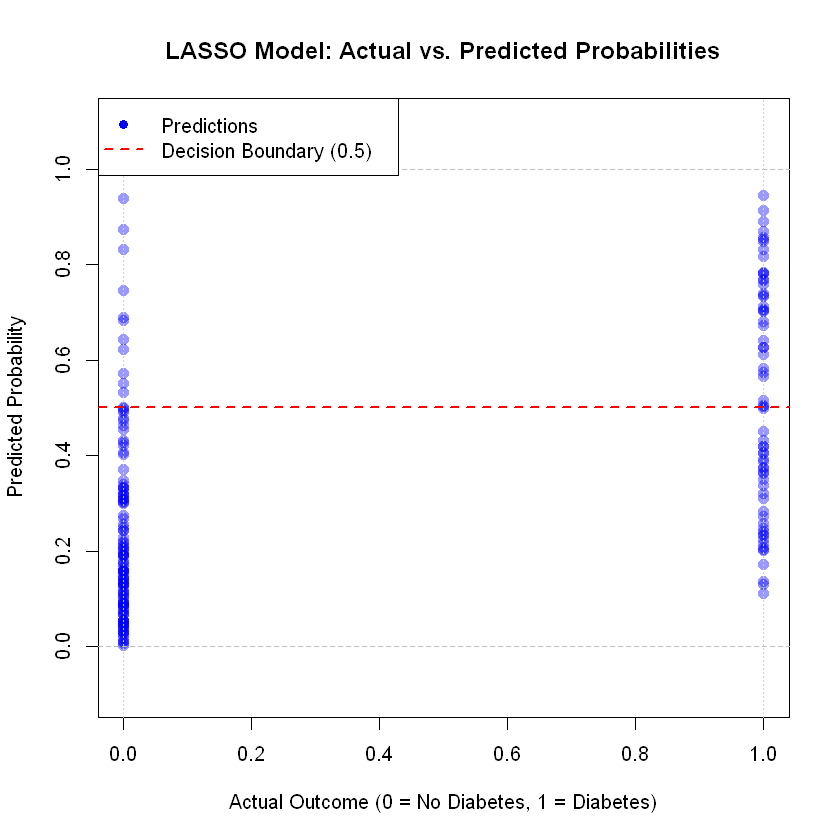

In [14]:
# Load required library
library(glmnet)

# Load the diabetes dataset
diabetes <- read.csv("diabetes.csv")

# Set seed for reproducibility
set.seed(123)

# Scale the predictor variables (all columns except Outcome)
diabetes_scaled <- diabetes
diabetes_scaled[, -9] <- scale(diabetes[, -9])

# Create training and testing split (75/25)
sample_size <- floor(0.75 * nrow(diabetes_scaled))
train_indices <- sample(seq_len(nrow(diabetes_scaled)), size = sample_size)

# Split into training and testing sets
train_data <- diabetes_scaled[train_indices, ]
test_data <- diabetes_scaled[-train_indices, ]

# Prepare data for glmnet (needs matrix format)
x_train <- as.matrix(train_data[, -9])
y_train <- train_data$Outcome

x_test <- as.matrix(test_data[, -9])
y_test <- test_data$Outcome

# Fit LASSO logistic regression model with cross-validation
set.seed(123)
cv_lasso <- cv.glmnet(x_train, y_train, family = "binomial", alpha = 1)

# Get the best lambda
best_lambda <- cv_lasso$lambda.min

# Fit final LASSO model with best lambda
lasso_model <- glmnet(x_train, y_train, family = "binomial", alpha = 1, lambda = best_lambda)

# Make predictions on test data (probabilities)
lasso_predicted_prob <- predict(lasso_model, newx = x_test, type = "response")

# Create actual vs. predicted plot
plot(y_test, lasso_predicted_prob,
     xlab = "Actual Outcome (0 = No Diabetes, 1 = Diabetes)",
     ylab = "Predicted Probability",
     main = "LASSO Model: Actual vs. Predicted Probabilities",
     pch = 16, col = rgb(0, 0, 1, 0.4),
     ylim = c(-0.1, 1.1),
     cex = 1.2)

# Add horizontal reference lines at 0 and 1
abline(h = 0, col = "gray", lty = 2)
abline(h = 1, col = "gray", lty = 2)

# Add vertical lines at actual values (0 and 1)
abline(v = 0, col = "lightgray", lty = 3)
abline(v = 1, col = "lightgray", lty = 3)

# Add a horizontal line at the decision boundary (0.5)
abline(h = 0.5, col = "red", lwd = 2, lty = 2)

# Add legend
legend("topleft", legend = c("Predictions", "Decision Boundary (0.5)"), 
       col = c("blue", "red"), pch = c(16, NA), lty = c(NA, 2), lwd = c(NA, 2))
